In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
%config NotebookApp.iopub_msg_rate_limit=10000
import statistics as stats

In [2]:
df_1 = pd.read_csv('travelers.csv')

In [3]:
random.seed(7)

def randomIndex(count, df):
    randList = []
    while len(randList) <= count:
        num = random.randint(0,len(df))
        if not num in randList:
            randList.append(num)
    return randList
        
testIDX = randomIndex(10000, df_1)
df = df_1.iloc[testIDX].reset_index(drop=True)

In [4]:
df.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score
0,48,Male,Scientist,Business,Proxima Centauri,Danielle Lake,2.41,16.0,1,Tourism,Warp Drive,1355.301140,2023-12-26,2024-04-03,Window Seat,Yes,12,110.0
1,71,Female,Businessperson,Economy,Alpha Centauri,Amanda Divide,0.62,5.0,1,Tourism,Other,183.085100,2022-09-02,2024-12-07,NaN,No,9,90.0
2,53,Female,Businessperson,Business,Kepler-22b,Andrews Mountains,20.83,3.0,1,Tourism,Ion Thruster,1751.330889,2023-10-31,2025-12-02,Extra Space Suit,Yes,10,107.0
3,50,Female,Businessperson,Luxury,Tau Ceti,Andrew Manor,0.63,88.0,1,Research,Ion Thruster,741.705195,2023-09-25,2024-09-06,Other,No,9,102.0
4,58,Male,Scientist,Luxury,Trappist-1,Dawson Ranch,7.51,27.0,2,Other,Solar Sailing,1552.727345,2023-06-05,2025-08-11,Extra Space Suit,Yes,6,97.0


In [7]:
len(df['Destination'].unique())

20

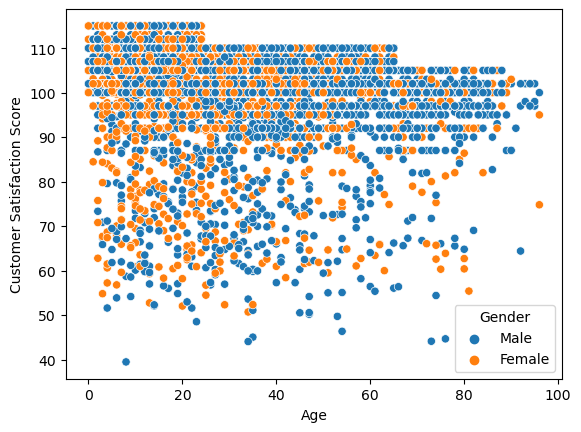

In [13]:
sns.scatterplot(data=df, x='Age', y='Customer Satisfaction Score', hue='Gender')
plt.show()


C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

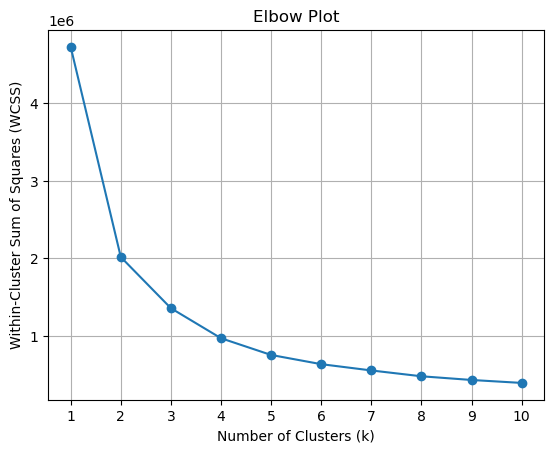

In [15]:
data = df[['Age', 'Customer Satisfaction Score']].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

C:\Users\zache\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


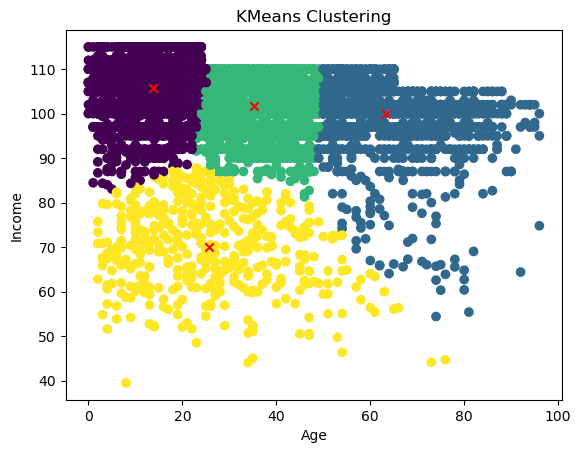

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMeans Clustering')
plt.show()

In [21]:
cluster_dataframes = {}
for label in set(labels):
    cluster_dataframes[label] = df[labels == label]
    
for label, df in cluster_dataframes.items():
    cluster_dataframes[label] = df.reset_index(drop=True)

In [28]:
clusterInfo = []

for key, df in cluster_dataframes.items():
    allOccupations = []
    for occupation in df['Occupation']:
        allOccupations.append(occupation)
    
    topOccupation = stats.mode(allOccupations)
    
    clusterInfo.append([key, 
    [round(min(cluster_dataframes[key]['Age']),2),
     round(max(cluster_dataframes[key]['Age']),2)], 
    [round(min(cluster_dataframes[key]['Customer Satisfaction Score']),2),
     round(max(cluster_dataframes[key]['Customer Satisfaction Score']),2)],
    topOccupation])

In [29]:
clusterInfo

[[0, [0, 25], [83.04, 115.0], 'Tourist'],
 [1, [49, 96], [54.39, 110.0], 'Businessperson'],
 [2, [23, 49], [81.3, 110.0], 'Scientist'],
 [3, [2, 76], [39.46, 87.81], 'Tourist']]